<a href="https://colab.research.google.com/github/suvitandale/ML_Project/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df = gold_data.drop('Date',axis=1)
df.head(5)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
corr = df.corr()

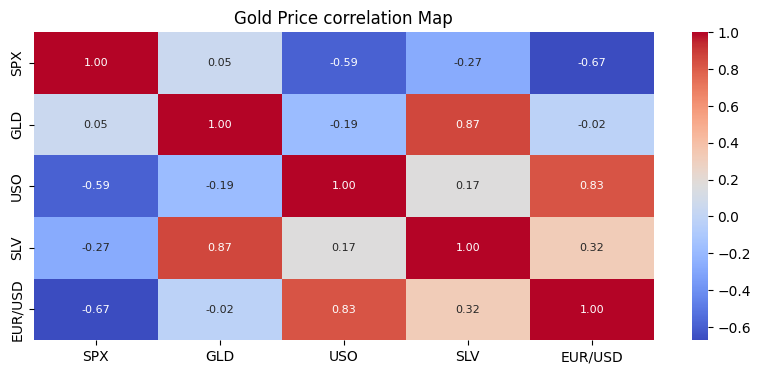

In [16]:
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot = True,cmap='coolwarm',fmt='.2f',cbar=True,annot_kws={'size':8})
plt.title("Gold Price correlation Map")
plt.show()

In [10]:
df.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
df.isnull().sum()

,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


# correlation Values

In [17]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


checking distribution plot of gold values

<ipython-input-18-3736964373>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

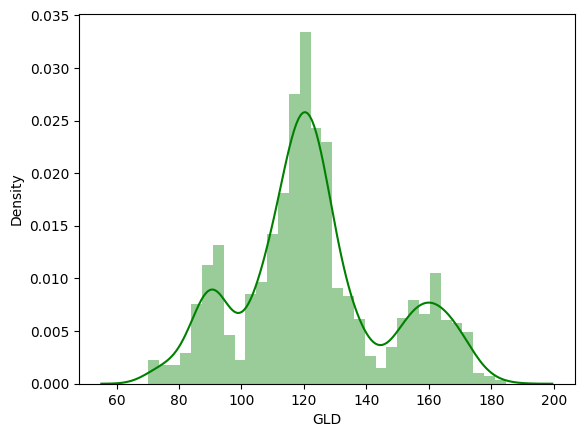

In [18]:
sns.distplot(df['GLD'],color='green')

Splitting the data into features and Target

In [19]:
X = df.drop(columns='GLD')
Y = df['GLD']

In [20]:
print(X.head(5))

           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099


In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

Building Random Forest Regression model

In [28]:
model = RandomForestRegressor(n_estimators=100)

In [29]:
model.fit(x_train,y_train)

RandomForestRegressor()

model Evalution

In [30]:
test_y_prediction = model.predict(x_test)

In [31]:
print(test_y_prediction)

[122.55599931 130.28530323 127.82470029  96.68499728 118.88130063
 114.5626997  124.97310103 117.82159943 107.92310106  98.0700998
  95.47160027 167.79129841 150.12870086 116.22590081 170.62870107
  85.04459979 123.35089896 109.12129737 113.40370097 131.74240287
 124.22869913 113.56750057 115.83080069 108.81630014 108.54420122
 125.77279916 118.77790005 112.32779945 113.23520126 125.83189902
 146.21510123  89.6618002  167.83979947 113.75429945 108.41310109
 120.17740131 141.40649905 161.26470174 173.98159784 153.12820149
 119.25650116 113.12540062 121.39019944 113.68719911 121.93963816
 108.11210107  88.64689891 114.54259922 129.54810226 117.73930112
 103.32210021 129.52860225 107.22209834 160.47490349 131.48980051
 118.05839975 147.04010141 137.66810245  95.4503009  124.79510154
 114.96629827  86.37250077 104.24099934 114.08440093  84.36449936
 122.28553815 116.55779927 113.6414018  163.67060313  92.16030048
  80.33740104 161.02640097 158.11750134 106.84619993 149.93910065
 110.024497

R Squared Error

In [32]:
error_score = r2_score(y_test,test_y_prediction)

In [33]:
print(error_score)

0.989822104727345


Compare Actual value and Predicted value in Plot

In [34]:
Y_test = list(y_test)

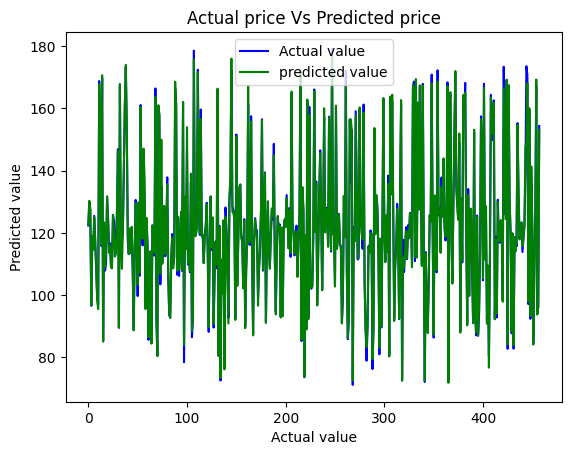

In [37]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_y_prediction,color='green',label='predicted value')
plt.title("Actual price Vs Predicted price")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.legend()
plt.show()